# Anomaly Detection in World Energy Consumption
This notebook provides a comprehensive guide to perform anomaly detection on a dataset of world energy consumption. The steps include loading the dataset, data preprocessing, data visualization, and anomaly detection using Python libraries.

World Energy Consumption Dataset - https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption/




In [1]:
!pip install PyOD

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for PyOD: filename=pyod-1.1.2-py3-none-any.whl size=190289 sha256=0e6913e8d48c541e61932812e9ebb83f28f83a96337b5e2d230964cdd62cf644
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built PyOD


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pyod.models.knn import KNN
from pyod.models.iforest import IForest

## Step 1: Loading the Dataset

In [6]:
# Load the dataset
file_path = '/content/drive/MyDrive/DM-Assignment-Dataset/World Energy Consumption.csv'  # Update with your file path
energy_data = pd.read_csv(file_path)
energy_data.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


## Step 2: Data Preprocessing and Cleaning

In [7]:
# Selecting relevant columns
relevant_columns = ['country', 'year', 'population', 'gdp', 'energy_per_gdp', 'energy_per_capita']
efficiency_data = energy_data[relevant_columns]

# Handling Missing Values
cleaned_data = efficiency_data.dropna(subset=['gdp', 'energy_per_gdp', 'energy_per_capita'])
cleaned_data.head()

,country,year,population,gdp,energy_per_gdp,energy_per_capita
103,Afghanistan,1980,12486640.0,1.532984e+10,0.508,623.929
104,Afghanistan,1981,11155196.0,1.564534e+10,0.561,786.837
105,Afghanistan,1982,10088290.0,1.598041e+10,0.585,926.651
106,Afghanistan,1983,9951447.0,1.675533e+10,0.683,1149.196
107,Afghanistan,1984,10243689.0,1.707215e+10,0.673,1121.573


## Step 3: Data Visualization

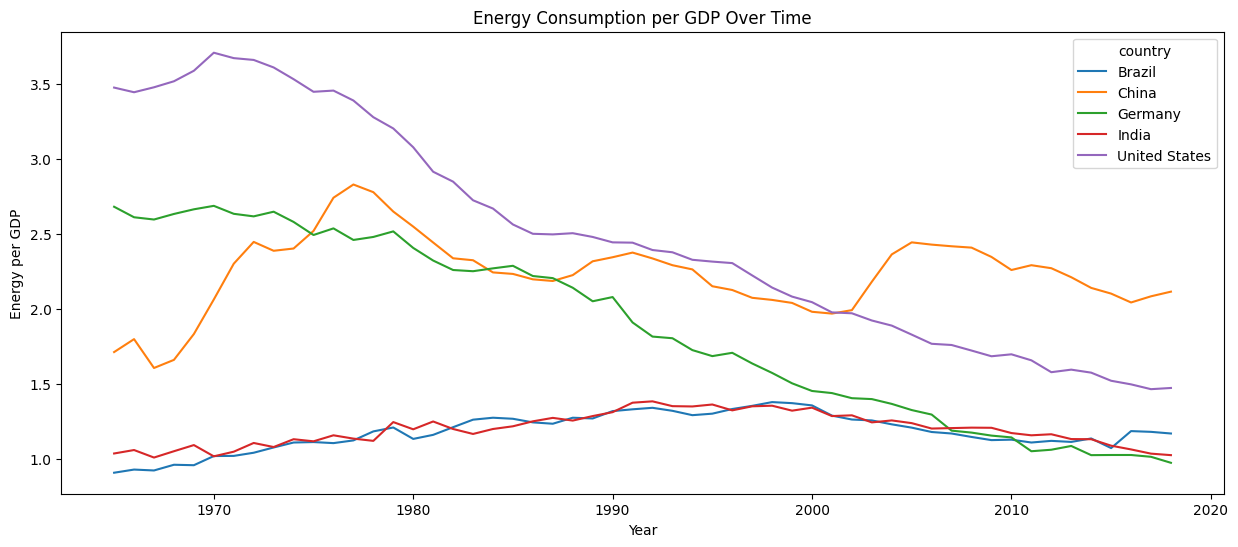

In [8]:
# Visualizing trends for selected countries
selected_countries = ['United States', 'China', 'Germany', 'India', 'Brazil']
trend_data = cleaned_data[cleaned_data['country'].isin(selected_countries)]

plt.figure(figsize=(15, 6))
sns.lineplot(x='year', y='energy_per_gdp', hue='country', data=trend_data)
plt.title('Energy Consumption per GDP Over Time')
plt.ylabel('Energy per GDP')
plt.xlabel('Year')
plt.show()

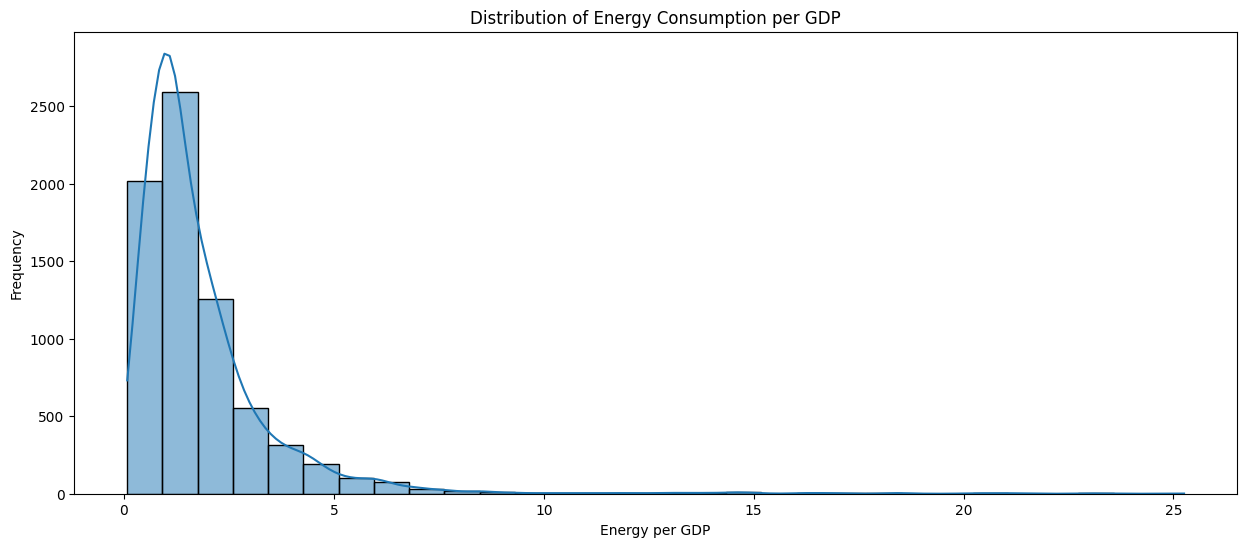

In [9]:
# Histograms for distribution of metrics
plt.figure(figsize=(15, 6))
sns.histplot(cleaned_data['energy_per_gdp'], bins=30, kde=True)
plt.title('Distribution of Energy Consumption per GDP')
plt.xlabel('Energy per GDP')
plt.ylabel('Frequency')
plt.show()

## Step 4: Anomaly Detection

In [11]:
# Assuming 'data' is your DataFrame
anomaly_data = cleaned_data[['energy_per_gdp', 'energy_per_capita']]  # Select relevant features

In [12]:
# Assuming PyOD is installed and anomaly scores are obtained
model = IForest()  # Example using Isolation Forest
model.fit(anomaly_data)
scores = model.decision_function(anomaly_data)
cleaned_data['anomaly_score'] = scores
cleaned_data['anomaly_score']

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
<ipython-input-12-5178c129e98d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['anomaly_score'] = scores


103     -0.135897
104     -0.140742
105     -0.141971
106     -0.146348
107     -0.148996
           ...   
22003   -0.084801
22004   -0.085860
22005   -0.090003
22006   -0.097487
22007   -0.091817
Name: anomaly_score, Length: 7211, dtype: float64

In [14]:
# Example: Displaying top 10 potential anomalies
anomalies = cleaned_data.sort_values(by='anomaly_score', ascending=False).head(10)
print(anomalies)


       country  year  population           gdp  energy_per_gdp  \
16712    Qatar  1992    471299.0  6.980116e+09          20.671   
16713    Qatar  1993    486053.0  7.619623e+09          20.249   
16714    Qatar  1994    500685.0  8.527819e+09          18.355   
16715    Qatar  1995    515140.0  9.599472e+09          16.250   
16711    Qatar  1991    456495.0  5.668716e+09          16.020   
1967   Bahrain  1987    466573.0  3.084997e+09          25.253   
1971   Bahrain  1991    535419.0  3.631866e+09          23.142   
16706    Qatar  1986    382338.0  4.988309e+09          14.448   
16709    Qatar  1989    426913.0  5.220840e+09          14.891   
1970   Bahrain  1990    517429.0  3.274114e+09          22.936   

       energy_per_capita  anomaly_score  
16712         306146.344       0.291883  
16713         317440.500       0.289630  
16714         312624.969       0.285143  
16715         302813.406       0.281793  
16711         198934.953       0.266339  
1967          166970.

## Visualization of Anomalies

In [17]:
threshold = np.percentile(cleaned_data['anomaly_score'], 95)  # Adjust the percentile as needed
cleaned_data['is_anomaly'] = cleaned_data['anomaly_score'] > threshold

<ipython-input-17-2256e8fe17cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['is_anomaly'] = cleaned_data['anomaly_score'] > threshold


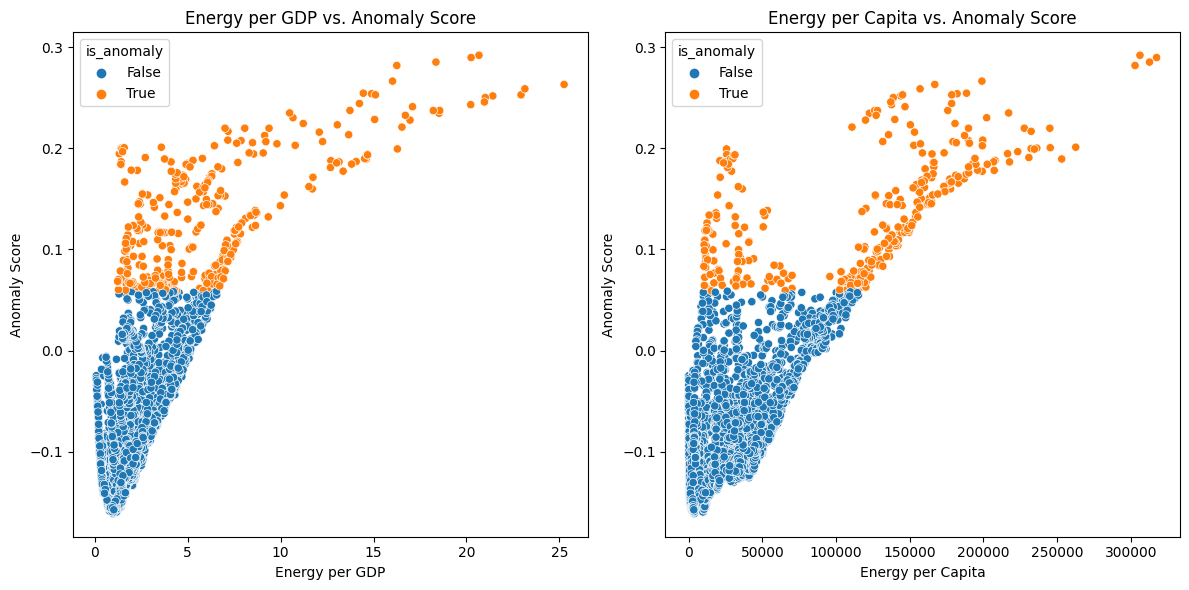

In [18]:
plt.figure(figsize=(12, 6))

# Scatter plot for energy_per_gdp vs. anomaly score
plt.subplot(1, 2, 1)
sns.scatterplot(x='energy_per_gdp', y='anomaly_score', hue='is_anomaly', data=cleaned_data)
plt.title('Energy per GDP vs. Anomaly Score')
plt.xlabel('Energy per GDP')
plt.ylabel('Anomaly Score')

# Scatter plot for energy_per_capita vs. anomaly score
plt.subplot(1, 2, 2)
sns.scatterplot(x='energy_per_capita', y='anomaly_score', hue='is_anomaly', data=cleaned_data)
plt.title('Energy per Capita vs. Anomaly Score')
plt.xlabel('Energy per Capita')
plt.ylabel('Anomaly Score')

plt.tight_layout()
plt.show()
